### Data Preprocessing

In [1]:
import pandas as pd

# import the train dataset and see the information of the train data
data = pd.read_csv("./data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
# show a few of the dataset
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Convert sex attribute to category data so that we can used in algorithm latter.
data['Sex'] = data['Sex'].apply(lambda s:1 if s == 'male' else 0)

# handling the missing value with 0
data = data.fillna(0)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C


In [4]:
X_train= data[['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
X_train.head(10)

,Sex,Age,Pclass,SibSp,Parch,Fare
0,1,22.0,3,1,0,7.2500
1,0,38.0,1,1,0,71.2833
2,0,26.0,3,0,0,7.9250
3,0,35.0,1,1,0,53.1000
4,1,35.0,3,0,0,8.0500
5,1,0.0,3,0,0,8.4583
6,1,54.0,1,0,0,51.8625
7,1,2.0,3,3,1,21.0750
8,0,27.0,3,0,2,11.1333
9,0,14.0,2,1,0,30.0708


In [5]:
X_train = X_train.values

In [6]:
data['Deceased'] = data['Survived'].apply(lambda s:int(not s))
data['Deceased'].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Deceased, dtype: int64

In [7]:
y_train= data[['Deceased', 'Survived']].values

In [8]:
y_train

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=int64)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Build Decision Tree

In [10]:
# construct a tree 
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 0)
clf = clf.fit(X_train, y_train)

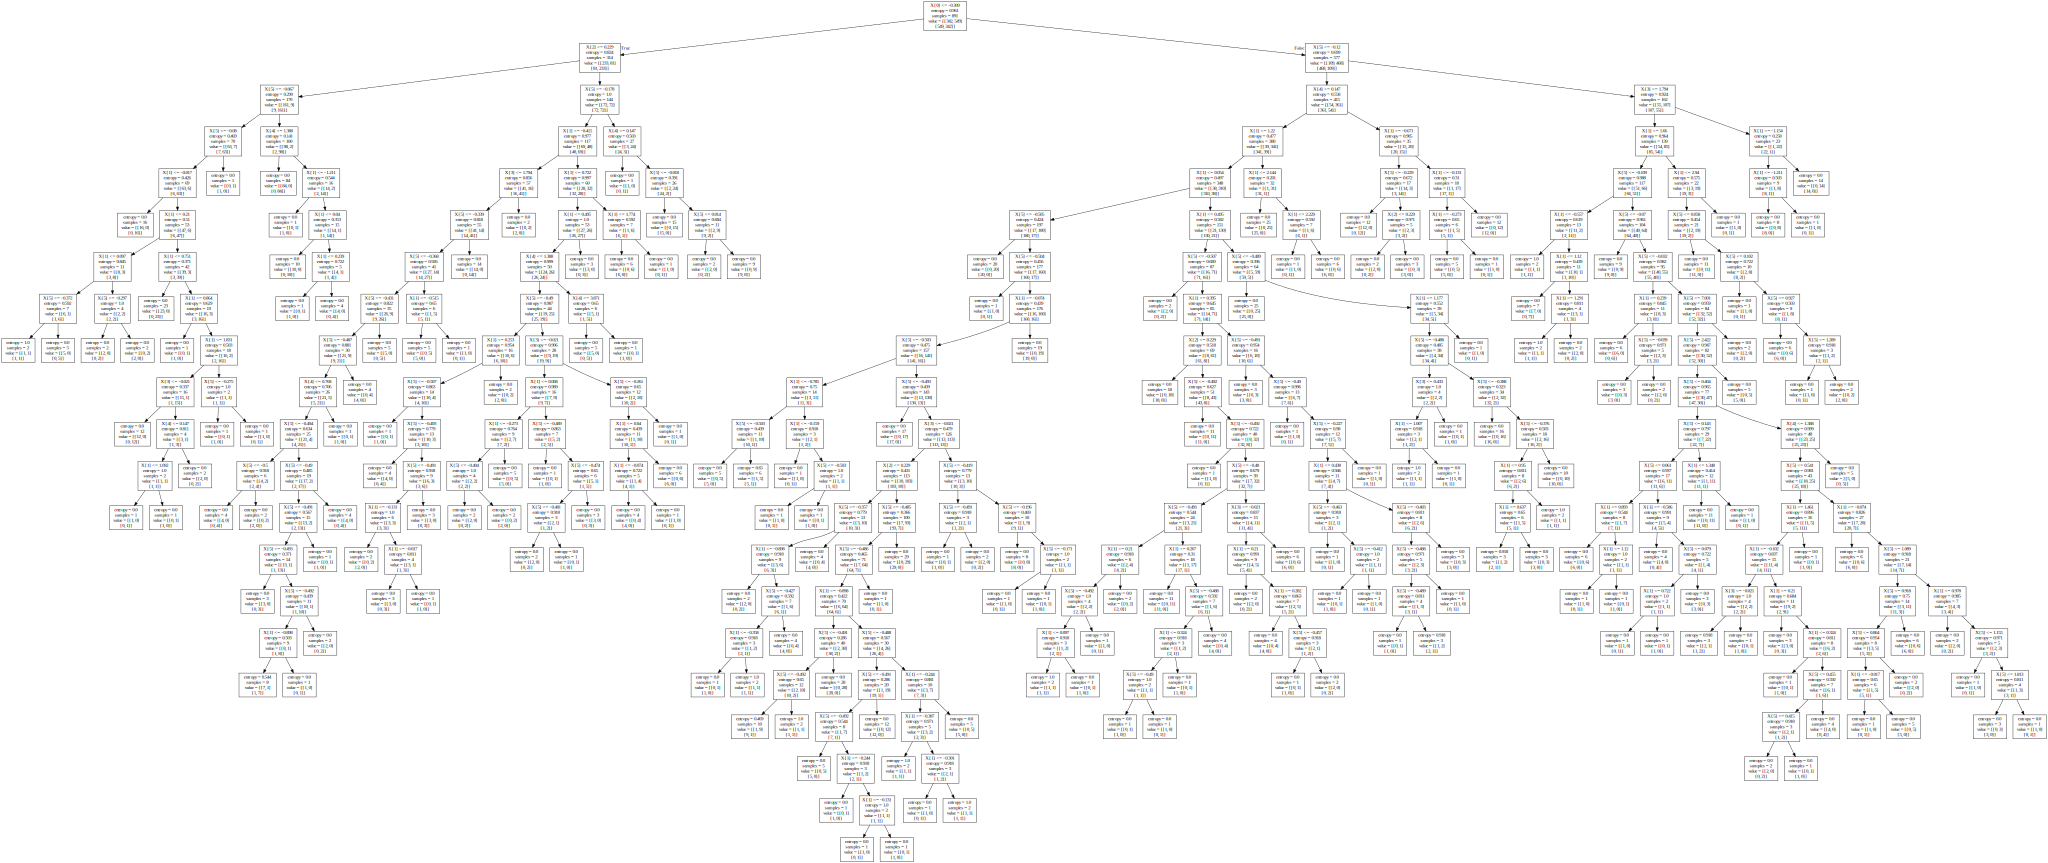

In [11]:
# output a graph of tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

### Test 

In [12]:
# import test data

test_data = pd.read_csv('./data/test.csv')
test_data = test_data.fillna(0)
test_data['Sex'] = test_data['Sex'].apply(lambda s:1 if s == 'male' else 0)
X_test = test_data[['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']].values
X_test = sc.transform(X_test)

In [13]:
import numpy as np
pred = np.argmax(clf.predict(X_test),1)

In [14]:
print(pred)

[0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [16]:
submission = pd.DataFrame({"PassengerId":test_data['PassengerId'], 
                           "Survived":pred})
submission.to_csv("submission_DecisionTree.csv", index=False)